# Exercise Sheet 5

Leon Oleschko and Aurel Müller-Schoenau  
20.12.2022

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import math

## Aufgabe 2

/tmp/ipykernel_82297/3189575376.py:32: RuntimeWarning: divide by zero encountered in log
  ax[1].imshow(np.log(np.abs(fft[center[0]-size:center[0]+size, center[1]-size:center[1]+size])), cmap='gray')


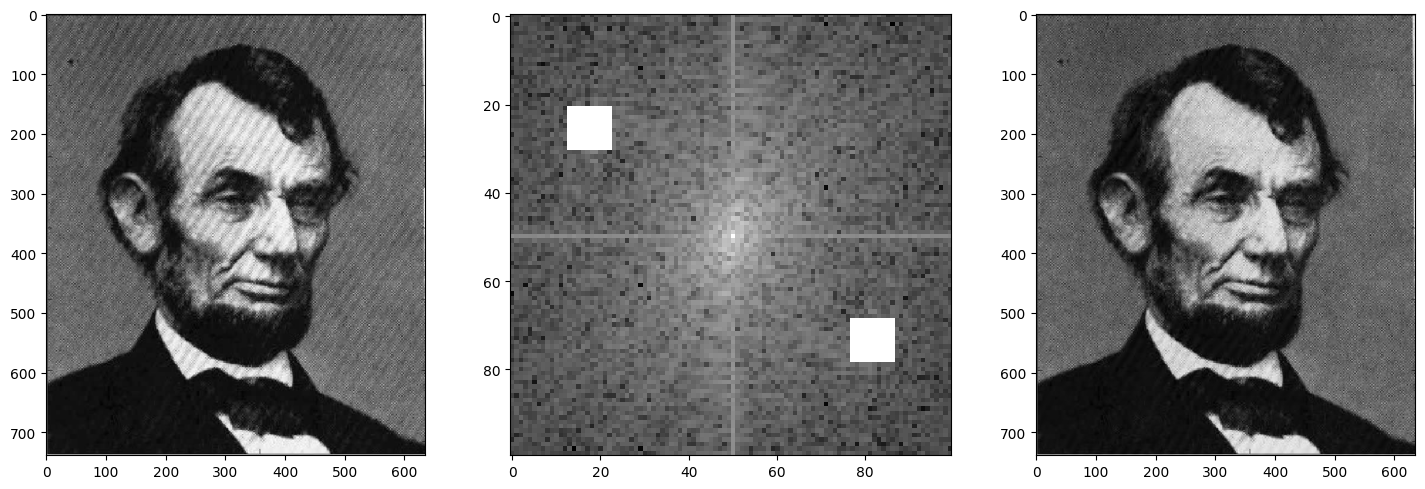

In [246]:
img = plt.imread('lincoln.jpg')
img = np.mean(img, axis=2)

# plot img, fft, and img after fft
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(img, cmap='gray')

fft = np.fft.fft2(img)
fft = np.fft.fftshift(fft)

# create a cross mask
center = np.array(fft.shape) // 2
size = 50
mask = np.ones(fft.shape)
#mask[center[0]-size:center[0]+size, center[1]-size:center[1]+size] = 1

# mask out the point
point = (24, 32)
pointSize = 5
# point + center
mask[center[0]+point[0]-pointSize:center[0]+point[0]+pointSize, center[1]+point[1]-pointSize:center[1]+point[1]+pointSize] = 0
# point - center
mask[center[0]-point[0]-pointSize:center[0]-point[0]+pointSize, center[1]-point[1]-pointSize:center[1]-point[1]+pointSize] = 0



fft = fft * mask
ax[1].imshow(np.log(np.abs(fft[center[0]-size:center[0]+size, center[1]-size:center[1]+size])), cmap='gray')

fft = np.fft.fftshift(fft)
img = np.fft.ifft2(fft)
ax[2].imshow(np.abs(img), cmap='gray')

plt.tight_layout()
plt.show()

# export image
plt.imsave('lincoln_filtered.jpg', np.abs(img), cmap='gray')

## Aufgabe 3

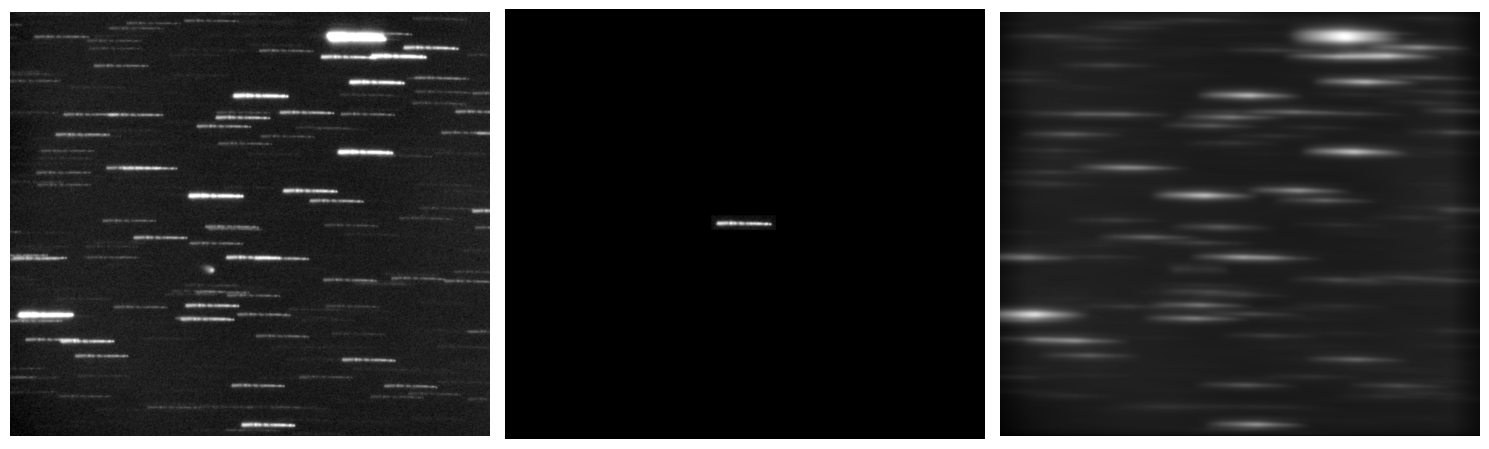

In [237]:
img = plt.imread('Sternspuren.jpg')
img = np.mean(img, axis=2)
kernel = plt.imread('Sternspur01.png')
kernel = np.mean(kernel, axis=2)

# make plot with image, kernel and convolution
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(img, cmap='gray')

# map kernel between 0 and 1
kernel = (kernel - kernel.min()) / (kernel.max() - kernel.min())
# increase kernel contrast
#kernel = kernel**3
# binarize kernel
#kernel = kernel > kernel.mean()
# expand kernel with zeros on all sides
kernel = np.pad(
	kernel,
	(
		(img.shape[0] - kernel.shape[0]) // 2,
		(img.shape[1] - kernel.shape[1]) // 2
	)
)
ax[1].imshow(kernel, cmap='gray')

# convolve the kernel on the image
conv = sp.signal.fftconvolve(
	img, kernel,
	mode='same'
)
ax[2].imshow(conv, cmap='gray')

# remove axis
for a in ax:
	a.axis('off')
plt.tight_layout()
plt.show()